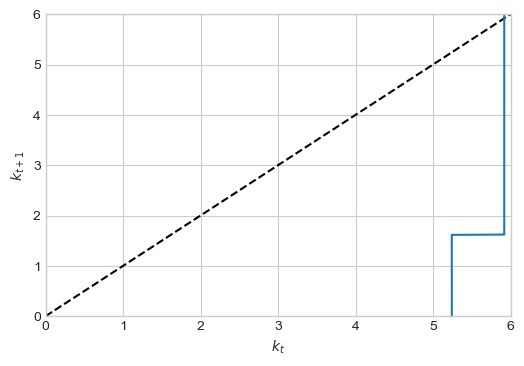

In [9]:
import OLGModel

OLGModel.transition_curve(1,1)